In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [2]:
zip_file_path = 'data.zip'
csv_file_inside_zip = 'data.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df = df[(df['Distance_in_kms'] <= 75)]

In [6]:
df = df[(df['Duration'] <= 80)]

In [7]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Holiday,...,Motive_Other motives,Motive_Service/Education/Business,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Weekday_sin,Weekday_cos,Month_sin,Month_cos
0,1,1,42,0,2,1,1,0,0,0,...,0,0,1,0,0,0,-0.781831,0.623490,5.000000e-01,0.866025
1,1,1,42,0,2,1,1,0,0,0,...,0,0,1,0,0,0,-0.781831,0.623490,5.000000e-01,0.866025
2,1,1,42,0,2,1,1,0,0,0,...,0,0,0,0,0,1,-0.781831,0.623490,5.000000e-01,0.866025
3,1,1,42,0,2,1,1,0,0,0,...,0,0,0,0,0,1,-0.781831,0.623490,5.000000e-01,0.866025
4,2,1,42,0,2,1,1,0,0,0,...,0,0,1,0,0,0,-0.974928,-0.222521,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663734,3,0,49,1,4,1,1,0,0,0,...,0,1,0,0,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000
663735,3,0,49,1,4,1,1,0,0,0,...,0,0,1,0,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000
663736,3,0,49,1,4,1,1,0,0,0,...,0,0,1,0,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000
663737,3,0,49,1,4,1,1,0,0,0,...,0,0,0,1,0,0,-0.433884,-0.900969,-2.449294e-16,1.000000


In [8]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Round_trip', 'Duration', 'Mode', 'Distance_in_kms',
       'Hour_sin', 'Hour_cos', 'Motive_Go to/return from work',
       'Motive_Other motives', 'Motive_Service/Education/Business',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Tours/hiking', 'Motive_Visits', 'Weekday_sin', 'Weekday_cos',
       'Month_sin', 'Month_cos'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

People_in_house                      0
Gender                               0
Age                                  0
Background                           0
Education                            0
Driver_license                       0
Cars_in_house                        0
Mopeds_in_house                      0
Electric_bike                        0
Holiday                              0
Round_trip                           0
Duration                             0
Mode                                 0
Distance_in_kms                      0
Hour_sin                             0
Hour_cos                             0
Motive_Go to/return from work        0
Motive_Other motives                 0
Motive_Service/Education/Business    0
Motive_Shopping/Grocery              0
Motive_Social and recreational       0
Motive_Tours/hiking                  0
Motive_Visits                        0
Weekday_sin                          0
Weekday_cos                          0
Month_sin                

In [11]:
drops = ["Mode", "Motive_Tours/hiking", "Round_trip"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [12]:
X, y = shuffle(X, y, random_state=42)

In [13]:
X.shape

(629498, 24)

In [14]:
X

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Holiday,...,Motive_Go to/return from work,Motive_Other motives,Motive_Service/Education/Business,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Visits,Weekday_sin,Weekday_cos,Month_sin,Month_cos
57719,1,0,50,0,3,1,2,0,0,0,...,0,0,0,0,1,0,-0.974928,-0.222521,5.000000e-01,-0.866025
439974,2,1,42,0,3,1,1,0,1,0,...,0,0,0,0,0,0,-0.433884,-0.900969,1.224647e-16,-1.000000
529511,2,0,60,0,3,1,1,0,1,0,...,0,0,0,0,0,1,0.433884,-0.900969,-8.660254e-01,0.500000
14163,4,1,46,0,4,0,1,0,0,0,...,1,0,0,0,0,0,0.781831,0.623490,5.000000e-01,0.866025
460641,5,1,52,1,4,1,2,0,1,0,...,0,0,0,1,0,0,0.781831,0.623490,-8.660254e-01,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116252,6,0,42,0,4,1,1,0,0,0,...,0,1,0,0,0,0,-0.974928,-0.222521,-8.660254e-01,0.500000
272595,3,1,33,1,4,0,0,0,0,0,...,1,0,0,0,0,0,0.433884,-0.900969,8.660254e-01,0.500000
385570,2,1,50,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0.974928,-0.222521,5.000000e-01,0.866025
138928,1,1,66,1,4,1,0,0,0,0,...,0,0,0,0,1,0,0.433884,-0.900969,8.660254e-01,0.500000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =42, stratify=y)

In [16]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    263567
1    143533
2    137607
3     21841
Name: count, dtype: int64

Class counts in y_test:
Mode
0    29285
1    15948
2    15290
3     2427
Name: count, dtype: int64


In [17]:
X_train.shape, X_test.shape

((566548, 24), (62950, 24))

In [18]:
skf = StratifiedKFold(n_splits=10, shuffle=False)

In [19]:
columns = X.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

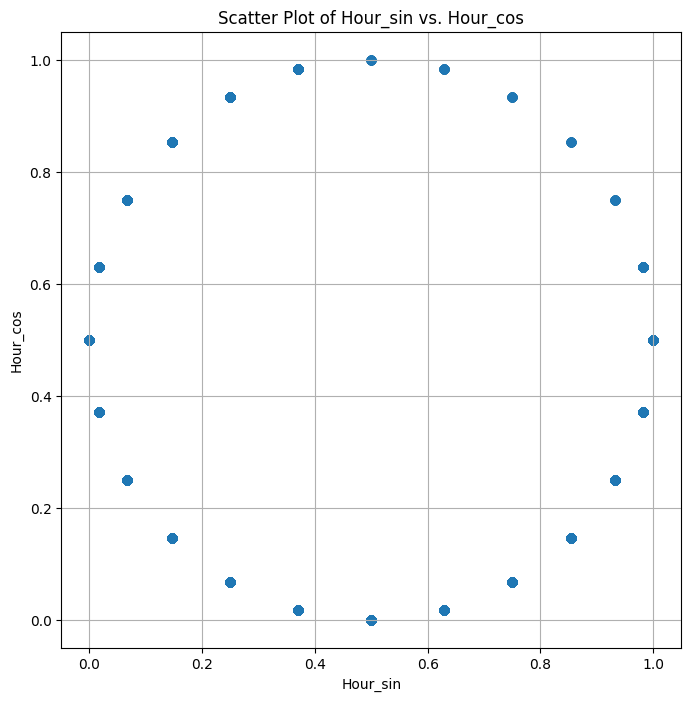

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Hour_sin'], X_test['Hour_cos'])
plt.title('Scatter Plot of Hour_sin vs. Hour_cos')
plt.xlabel('Hour_sin')
plt.ylabel('Hour_cos')
plt.grid(True)
plt.show()

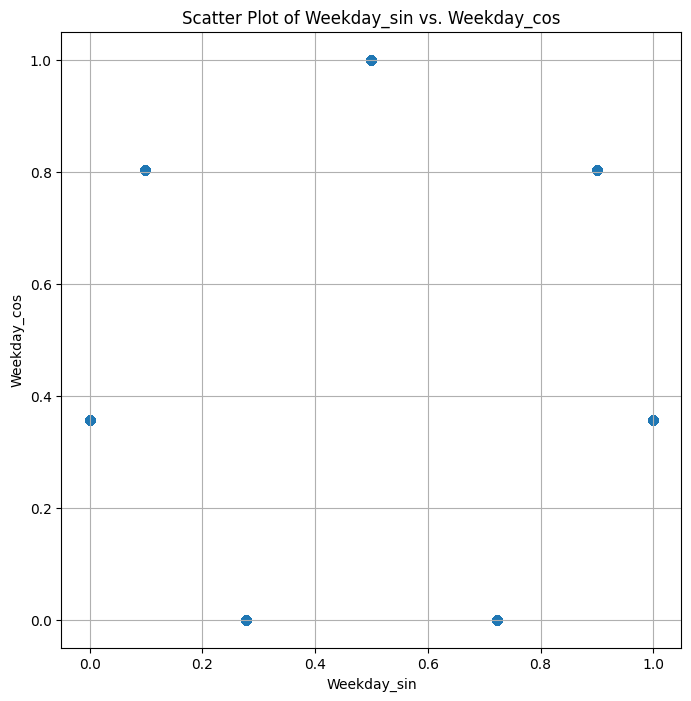

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Weekday_sin'], X_test['Weekday_cos'])
plt.title('Scatter Plot of Weekday_sin vs. Weekday_cos')
plt.xlabel('Weekday_sin')
plt.ylabel('Weekday_cos')
plt.grid(True)
plt.show()

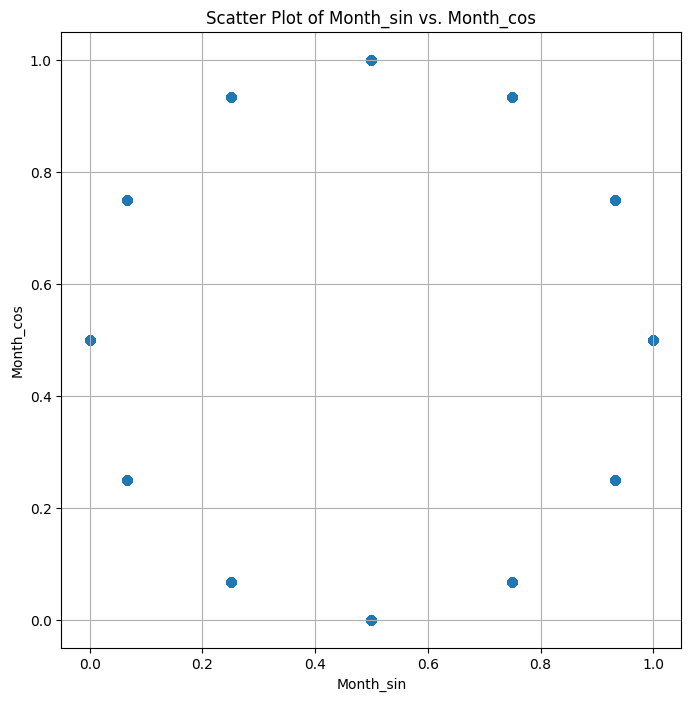

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Month_sin'], X_test['Month_cos'])
plt.title('Scatter Plot of Month_sin vs. Month_cos')
plt.xlabel('Month_sin')
plt.ylabel('Month_cos')
plt.grid(True)
plt.show()

# Logistic Regression

In [26]:
pipeline = Pipeline(steps = [
    ('sampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', LogisticRegression(multi_class='ovr'))
])

In [27]:
param_grid = {'classifier__solver' : ['liblinear', 'lbfgs'],
              'classifier__max_iter': [400]}
grid_search_log = GridSearchCV(pipeline, param_grid, cv=skf, scoring='f1_macro')
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'classifier__max_iter': 400, 'classifier__solver': 'lbfgs'}


In [28]:
score = grid_search_log.best_score_
score

0.5839423169917125

In [29]:
logreg_model = grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78     29285
           1       0.54      0.47      0.50     15948
           2       0.75      0.83      0.79     15290
           3       0.18      0.63      0.27      2427

    accuracy                           0.67     62950
   macro avg       0.59      0.66      0.59     62950
weighted avg       0.74      0.67      0.70     62950



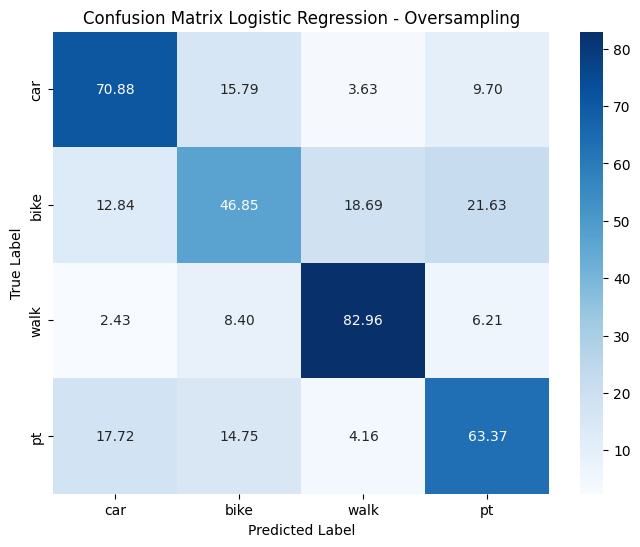

In [30]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression - Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
class_labels_mapping = {
    0: 'car',
    1: "bike",
    2: 'walk',
    3: 'pt'
}

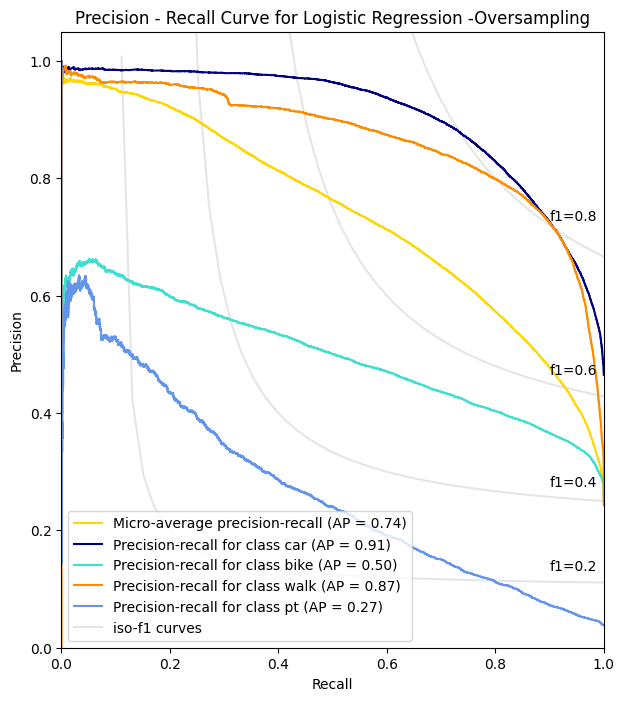

In [32]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Logistic Regression -Oversampling")

plt.show()

# Decision Tree

In [33]:
pipeline = Pipeline(steps = [
    ('sampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [34]:
param_grid = {
    'classifier__max_depth': list(range(8, 20)),
}

In [35]:
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro")

In [36]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [8, 9, 10, 11, 12, 13, 14, 15,
                                                   16, 17, 18, 19]},
             scoring='f1_macro')

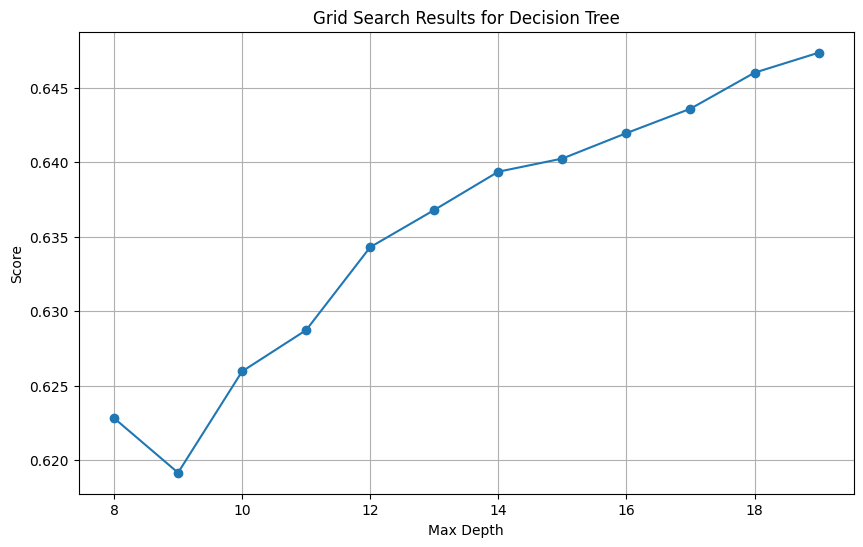

In [37]:
results = grid_search.cv_results_
max_depth_values = results['param_classifier__max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [38]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_f_score = grid_search.best_score_

In [39]:
best_params

{'classifier__max_depth': 19}

In [40]:
best_f_score

0.6473359132963867

In [41]:
y_pred = best_model.predict(X_train)
tree_report_test = classification_report(y_train, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.96      0.79      0.87    263567
           1       0.71      0.83      0.76    143533
           2       0.90      0.90      0.90    137607
           3       0.48      0.94      0.63     21841

    accuracy                           0.83    566548
   macro avg       0.76      0.87      0.79    566548
weighted avg       0.86      0.83      0.84    566548



In [42]:
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.89      0.74      0.81     29285
           1       0.58      0.68      0.63     15948
           2       0.82      0.82      0.82     15290
           3       0.25      0.50      0.33      2427

    accuracy                           0.73     62950
   macro avg       0.64      0.68      0.65     62950
weighted avg       0.77      0.73      0.75     62950



In [43]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos'],
      dtype='object')

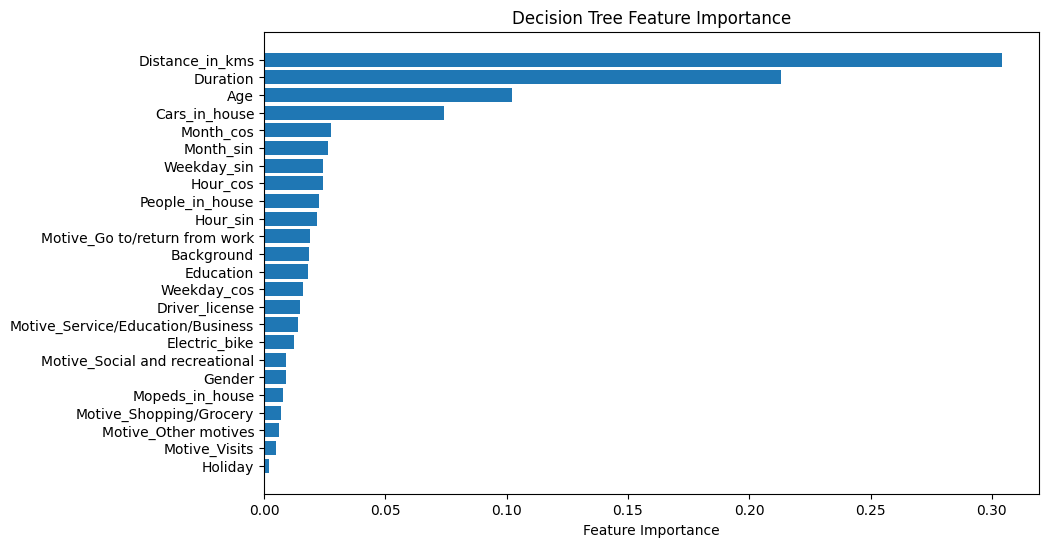

In [44]:
decision_tree_classifier = best_model.named_steps['classifier']

feature_importances = decision_tree_classifier.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

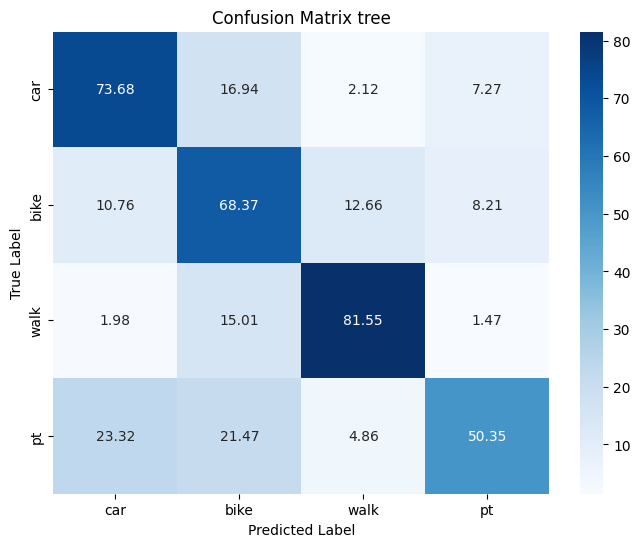

In [45]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

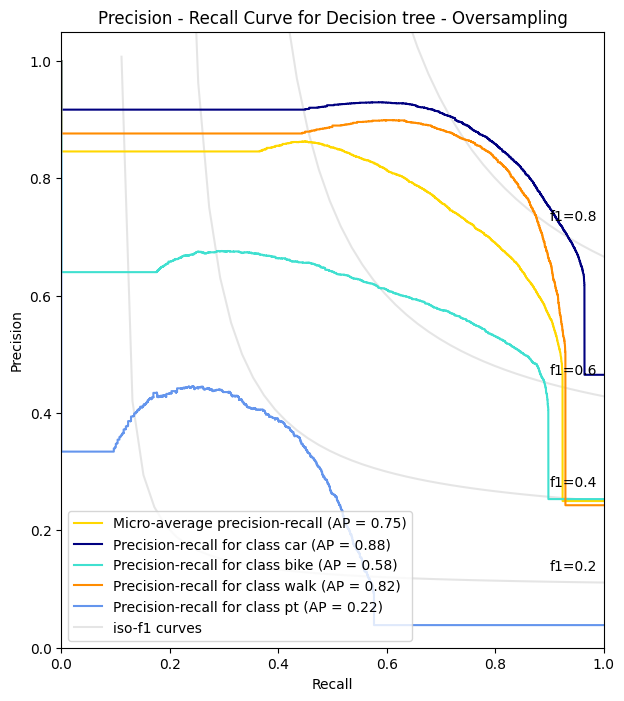

In [46]:
class_probabilities_tree = best_model.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree - Oversampling")

plt.show()

# Random Forest

In [46]:
X_train.shape, X_test.shape

((566548, 24), (62950, 24))

In [47]:
pipeline = Pipeline(steps = [
    ('sampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

In [48]:
param_grid = {
    'classifier__max_features' : list(range(4, 11))
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=skf, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'classifier__max_features': [4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [49]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 5}


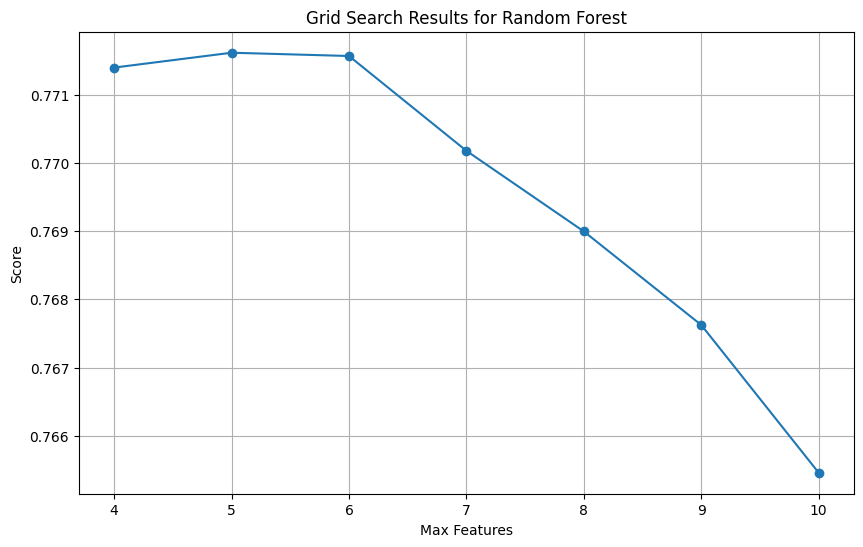

In [50]:
results = grid_search_rf.cv_results_
max_depth_values = results['param_classifier__max_features'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Random Forest')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [51]:
param_grid = {
    'classifier__n_estimators' : [400, 450, 550],
    'classifier__max_features' : [5],
}
grid_search_rf = GridSearchCV(pipeline, param_grid, cv=skf, scoring='f1_macro')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'classifier__max_features': [5],
                         'classifier__n_estimators': [400, 450, 550]},
             scoring='f1_macro')

In [52]:
best_params = grid_search_rf.best_params_
print(best_params)

{'classifier__max_features': 5, 'classifier__n_estimators': 400}


In [53]:
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
tree_report_test = classification_report(y_test, y_pred)
print(tree_report_test, sep='\n')

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     29285
           1       0.75      0.79      0.77     15948
           2       0.87      0.90      0.88     15290
           3       0.77      0.47      0.58      2427

    accuracy                           0.85     62950
   macro avg       0.82      0.77      0.79     62950
weighted avg       0.85      0.85      0.85     62950



In [54]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos'],
      dtype='object')

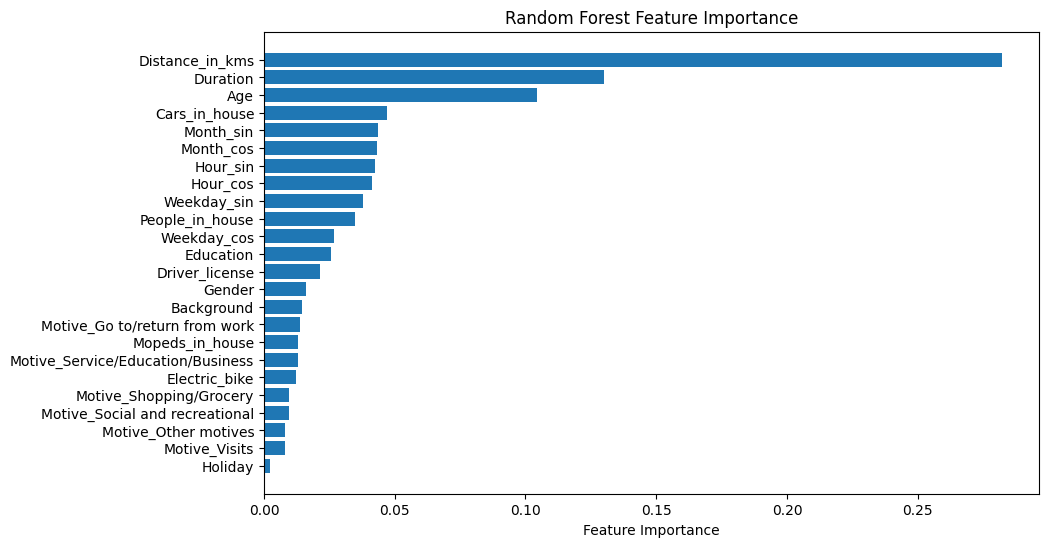

In [55]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

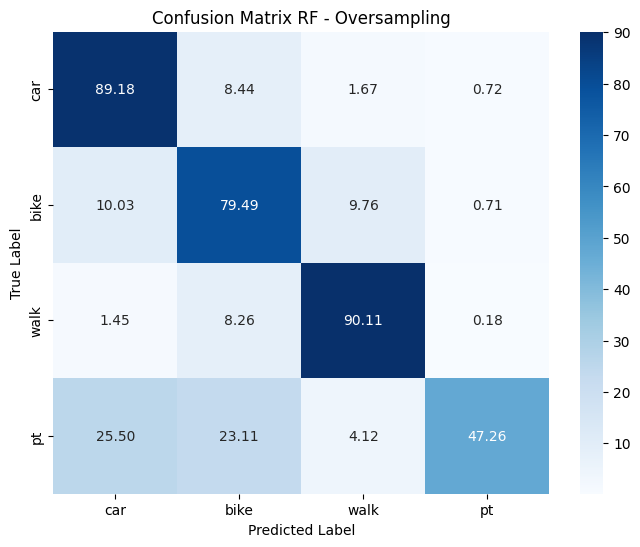

In [56]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF - Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

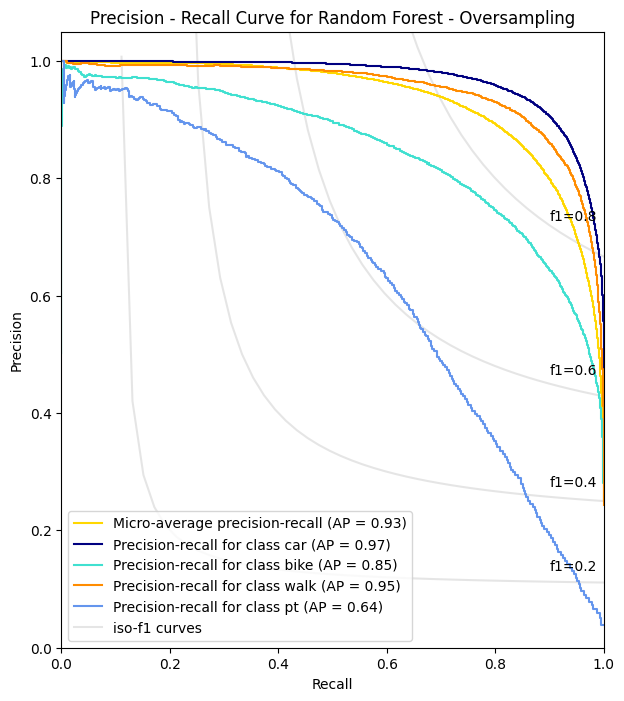

In [57]:
class_probabilities_rf = best_model.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest - Oversampling")

plt.show()

In [58]:
average_precision["micro"]

0.9334271013157497

# XGBoost

In [59]:
pipeline = Pipeline(steps = [
    ('sampler', RandomOverSampler(sampling_strategy='auto', random_state=42)),
    ('classifier', xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42))
])

In [21]:
param_grid = {
    'classifier__colsample_bytree' : [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('sampler',
                                        RandomOverSampler(random_state=42)),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=Fal...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'classifier__colsample_bytree': [0.2, 0.3, 0.4, 0.5,
                                                          0.6, 0.7, 0.8, 0.9,
                                                          1]},
             scoring='f1_macro')

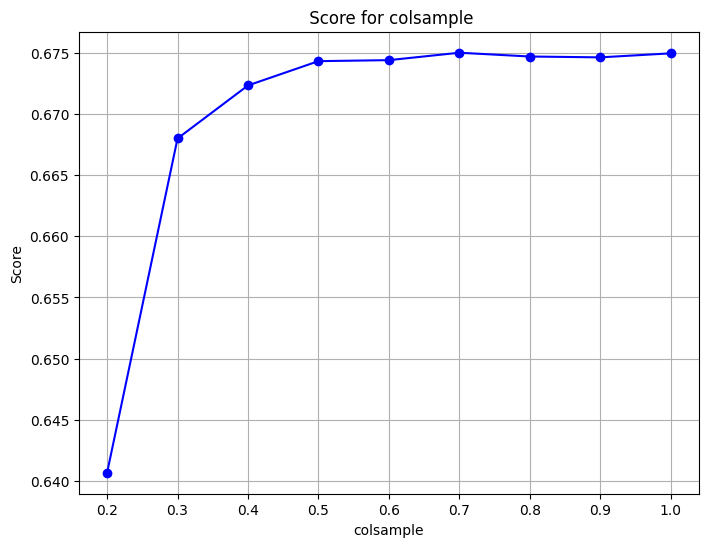

In [22]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample')
plt.xlabel('colsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [28]:
param_grid = {
    'classifier__subsample' : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

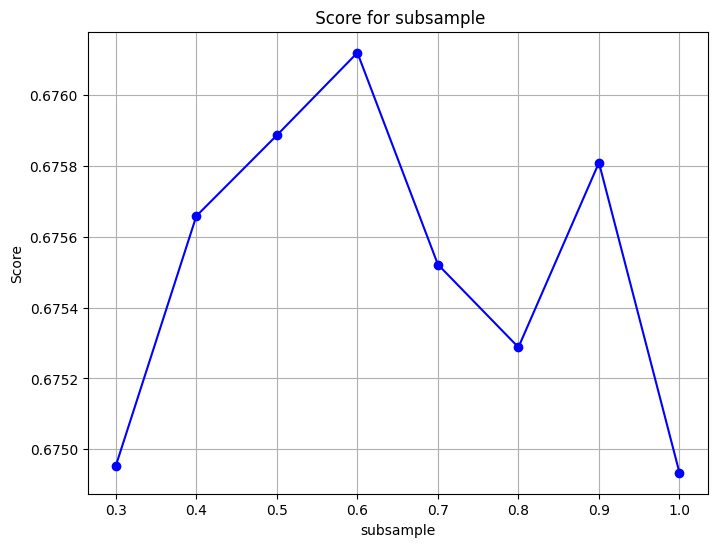

In [29]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

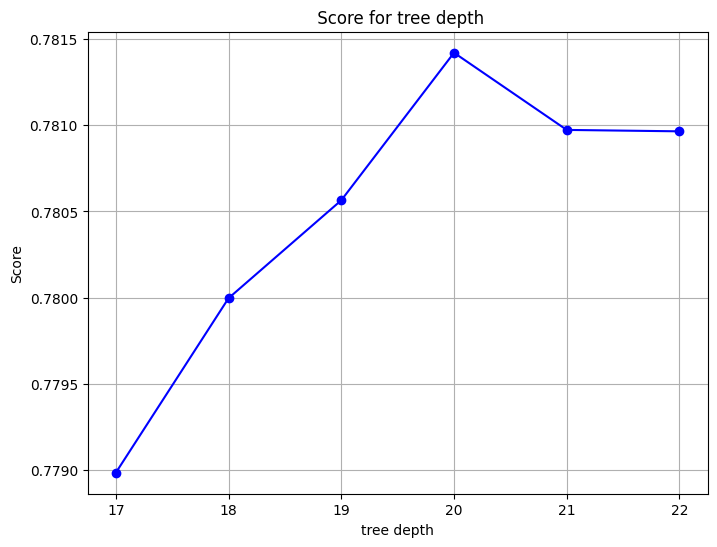

In [30]:
param_grid = {
    'classifier__max_depth' : [17, 18, 19, 20, 21, 22]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro")
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['classifier__max_depth']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for tree depth')
plt.xlabel('tree depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [69]:
param_grid = {
    'classifier__learning_rate' : [0.03, 0.05],
    'classifier__subsample' : [0.6], 
    'classifier__n_estimators' : [550, 600],
    'classifier__colsample_bytree' : [0.7],
    'classifier__max_depth': [20]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring="f1_macro", n_jobs=1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'classifier__colsample_bytree': 0.7, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 20, 'classifier__n_estimators': 600, 'classifier__subsample': 0.6}


In [76]:
best_model = grid_search.best_estimator_

In [77]:
y_pred = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     29285
           1       0.76      0.82      0.79     15948
           2       0.88      0.90      0.89     15290
           3       0.76      0.52      0.62      2427

    accuracy                           0.86     62950
   macro avg       0.83      0.78      0.80     62950
weighted avg       0.87      0.86      0.86     62950



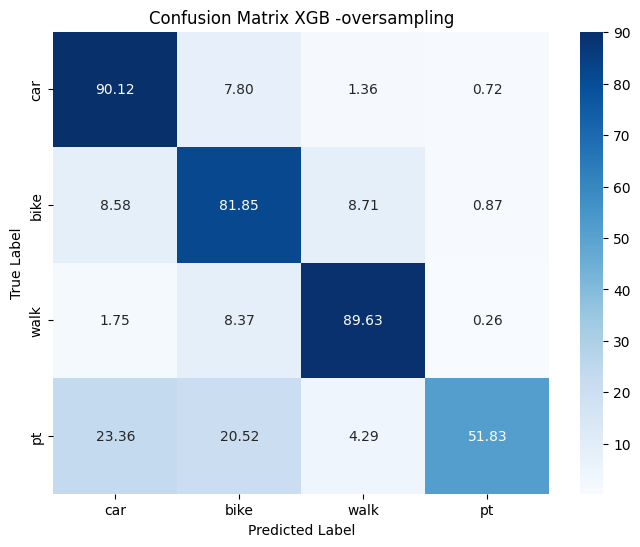

In [78]:
class_labels = ["car", "bike", "walk", 'pt']
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB -oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

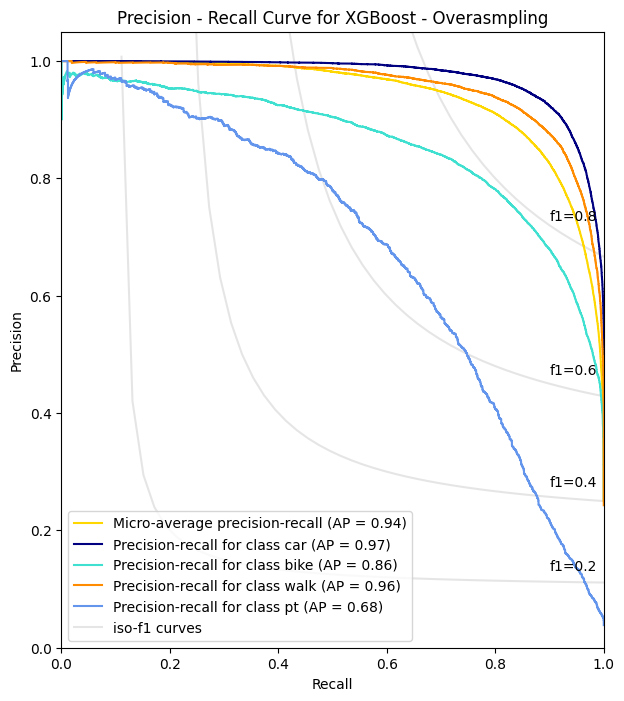

In [79]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(best_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for XGBoost - Overasmpling")

plt.show()

In [80]:
X.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos'],
      dtype='object')

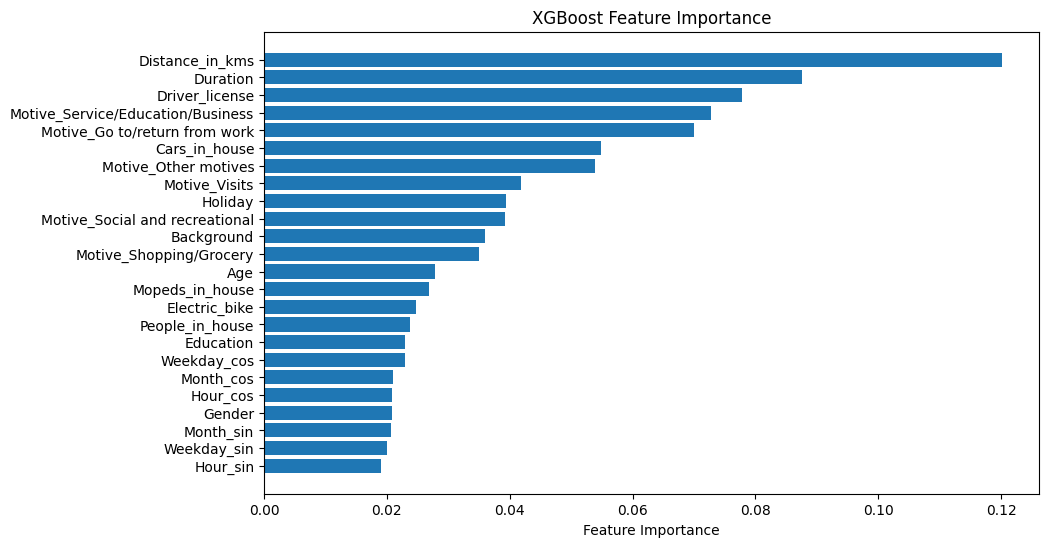

In [81]:
rf = best_model.named_steps['classifier']

feature_importances = rf.feature_importances_

feature_names = ['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Holiday', 'Duration', 'Distance_in_kms', 'Hour_sin', 'Hour_cos',
       'Motive_Go to/return from work', 'Motive_Other motives',
       'Motive_Service/Education/Business', 'Motive_Shopping/Grocery',
       'Motive_Social and recreational', 'Motive_Visits', 'Weekday_sin',
       'Weekday_cos', 'Month_sin', 'Month_cos']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()